In [ ]:
#EDA의 목적: 유의미한 상관관계를 갖는 속성의 조합을 찾아내는 것
# 1. 데이터 확인: 독립변수와 종속변수 구분 및 평균, 중앙, 최빈값 등 기초 통계량 확인
# 2. 상관관계 분석
# 3. 시각화: 상관관계가 있는 속성의 조합을 시각화하여 인사이트 도출

Digital Wallet: 338,180 (2,647.0건)
Credit Card: 342,480 (2,631.0건)
Cash: 358,919 (2,705.0건)

 상관관계 행렬:
                  Location  Category  Discount Applied  payment_sum
Location             1.000    -0.011            -0.007       -0.003
Category            -0.011     1.000            -0.003        0.009
Discount Applied    -0.007    -0.003             1.000        0.015
payment_sum         -0.003     0.009             0.015        1.000


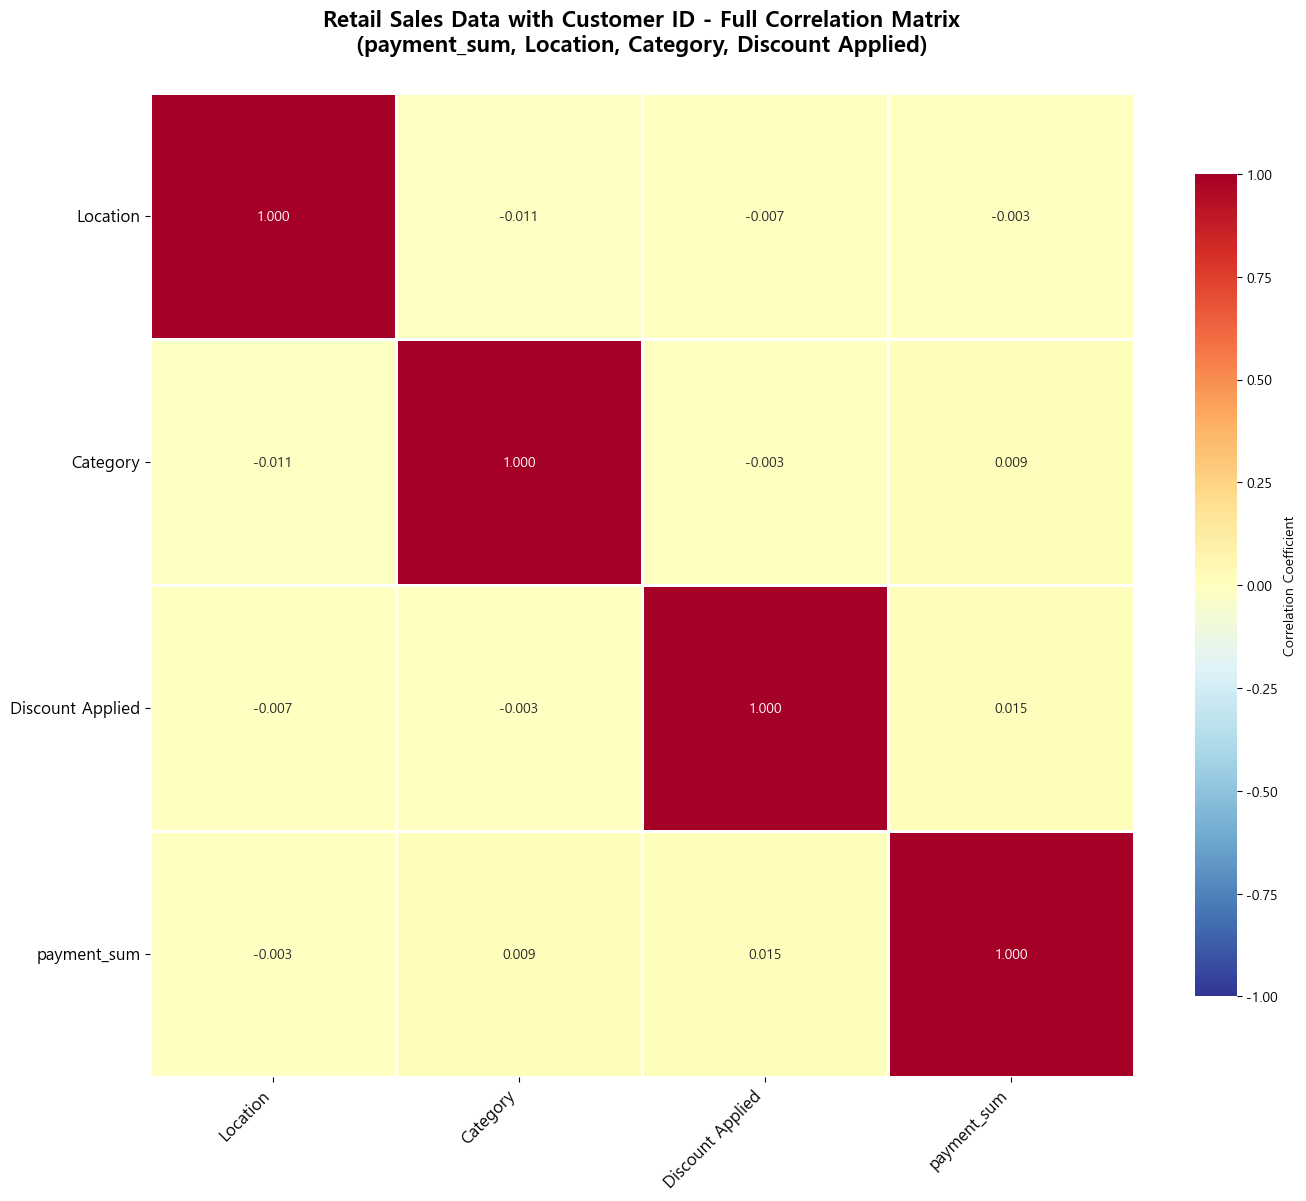

Location vs Category: -0.011 
Location vs Discount Applied: -0.007 
Location vs payment_sum: -0.003 
Category vs Discount Applied: -0.003 
Category vs payment_sum: +0.009 
Discount Applied vs payment_sum: +0.015 


In [ ]:
# 'Payment Method'와 'Total Spent'를 묶어서 ('Location', 'Category', 'Discount Applied')에
# 어떤 영향을 미치는지 상관관계를 분석해봄

# NA값('Total Spent','Discount Applied') 처리방법 총 3가지

# (1) NA값을 all drop


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False  

# 데이터 로드
df = pd.read_csv("retail_store_sales.csv")

# 분석할 컬럼들 선택
columns_of_interest = ['Payment Method', 'Location', 'Category', 'Discount Applied', 'Total Spent','Price Per Unit', 'Quantity']

# 분석 대상 컬럼 전체 결측치가 있는 행은 모두 제거
df_clean = df.dropna(subset=columns_of_interest).copy()

# 분석할 컬럼들 DataFrame 생성
df_selected = df_clean[columns_of_interest].copy()

# 범주형 변수들을 숫자로 인코딩
mapping_dict = {}
df_encoded = df_selected.copy()
for col in ['Payment Method', 'Location', 'Category']:
    # 고유값 매핑
    unique_values = df_selected[col].unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    df_encoded[col] = df_selected[col].map(mapping)
    # 역매핑 
    reverse_mapping = {idx: value for value, idx in mapping.items()}
    mapping_dict[col] = reverse_mapping

# payment_method 별 total spent 합산 후 payment_sum으로 지정 후 인코딩하고 거래횟수, 총거래금액을 함께 출력
df_encoded['payment_sum'] = df_encoded.groupby('Payment Method')['Total Spent'].transform('sum')
payment_summary = df_encoded.groupby('Payment Method')['Total Spent'].agg(['sum', 'count'])
for payment_method_code, (total_amount, transaction_count) in payment_summary.iterrows():
    original_payment_method = mapping_dict['Payment Method'][payment_method_code]
    print(f"{original_payment_method}: {total_amount:,.0f} ({transaction_count:,}건)")

# Payment Method, Total Spent 컬럼은 상관관계 분석에서 제외
df_encoded = df_encoded.drop(columns=['Payment Method'])

# 상관관계 계산 후 행렬 출력
correlation_matrix = df_encoded.corr() 
print(f"\n 상관관계 행렬:")
print(correlation_matrix.round(3))

# 히트맵 그리기 (전체 매트릭스)
plt.figure(figsize=(14, 12))

sns.heatmap(correlation_matrix, 
            annot=True,           # 수치 표시
            cmap='RdYlBu_r',      # 색상 맵 (빨강-노랑-파랑)
            center=0,             # 중심값
            square=True,          # 정사각형 셀
            fmt='.3f',            # 소수점 3자리
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            linewidths=1.0,       # 선 두께
            vmin=-1, vmax=1)      # 색상 범위 명시

plt.title('Retail Sales Data with Customer ID - Full Correlation Matrix\n(payment_sum, Location, Category, Discount Applied, Price Per Unit, Quantity, Total Spent)', 
          fontsize=16, pad=30, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# 상관관계 출력
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlations.append((abs(corr_value), corr_value, col1, col2))
for abs_corr, corr_value, col1, col2 in correlations:
    print(f"{col1} vs {col2}: {corr_value:+.3f} ")

Digital Wallet: 355,942 (2,783.0건)
Credit Card: 358,692 (2,756.0건)
Cash: 376,100 (2,837.0건)

 상관관계 행렬:
                  Location  Category  Discount Applied  payment_sum
Location             1.000    -0.014            -0.004       -0.003
Category            -0.014     1.000            -0.002        0.007
Discount Applied    -0.004    -0.002             1.000        0.017
payment_sum         -0.003     0.007             0.017        1.000


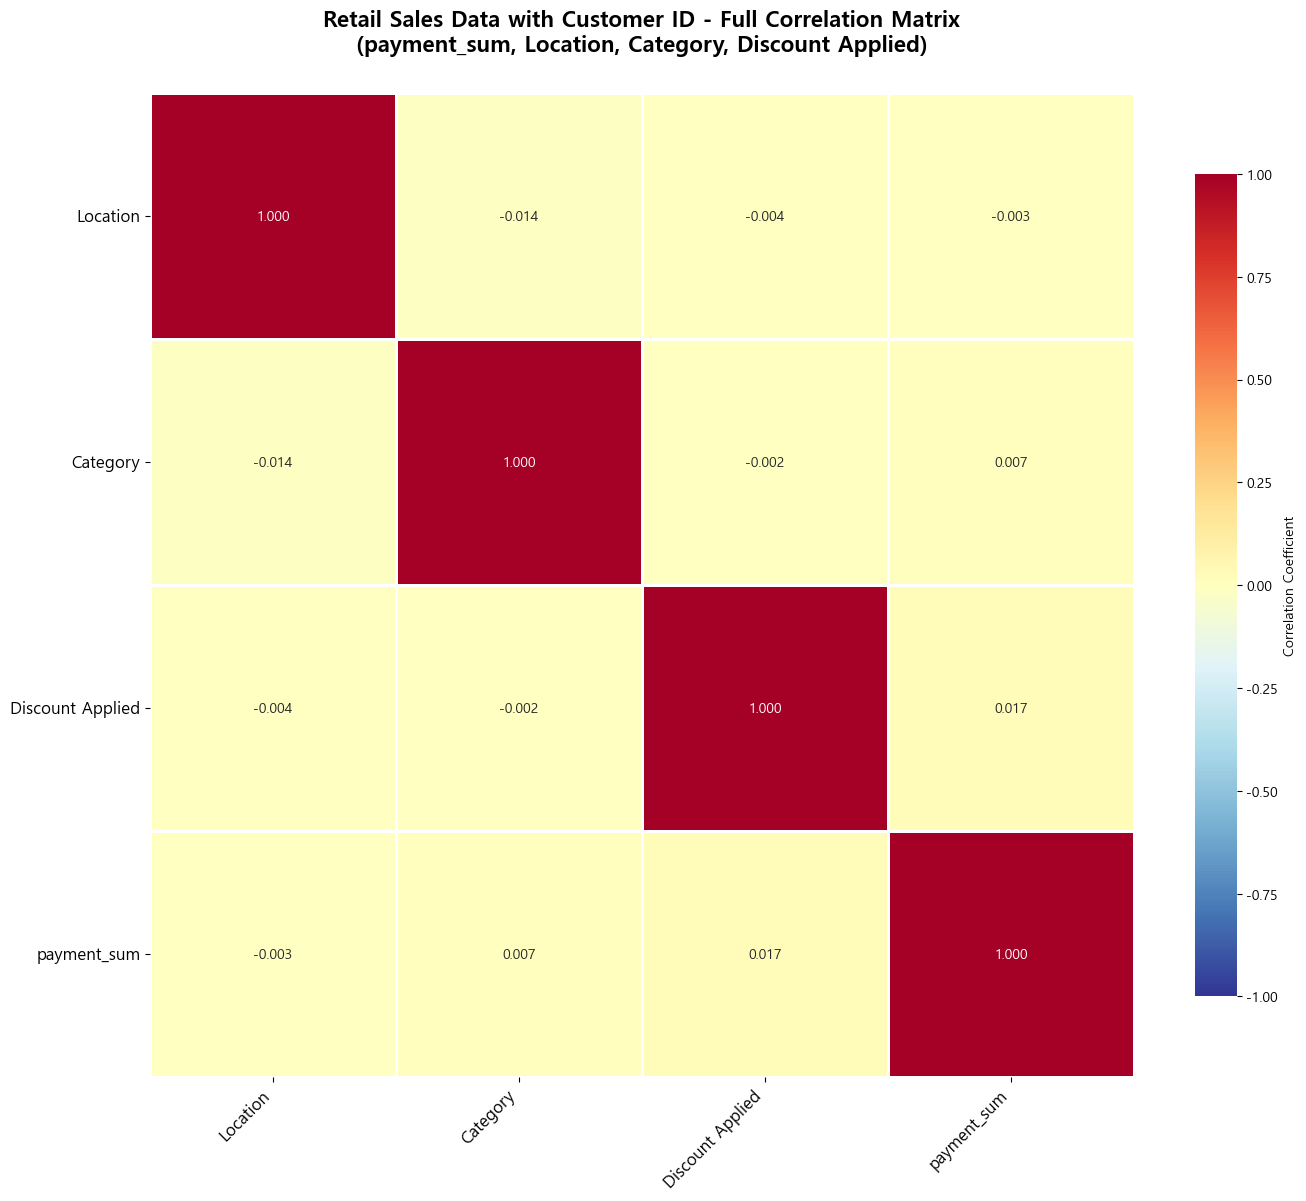

Location vs Category: -0.014 
Location vs Discount Applied: -0.004 
Location vs payment_sum: -0.003 
Category vs Discount Applied: -0.002 
Category vs payment_sum: +0.007 
Discount Applied vs payment_sum: +0.017 


Total Spent
40.0     87
140.0    83
80.0     82
25.0     80
55.0     77
         ..
170.0    17
30.5     17
17.0     16
37.0     15
166.5    12
Name: count, Length: 235, dtype: int64

In [ ]:
# (2) NA값을 평균값으로 대체 

# 데이터 로드
df = pd.read_csv("C:/Users/campus4D062/Desktop/교육자료/vscode/Practice/retail_store_sales.csv")

# 분석할 컬럼 지정
columns_of_interest = ['Payment Method', 'Location', 'Category', 'Discount Applied']


# 분석 대상 컬럼의 결측치가 있는 행 제거
df_clean = df.dropna(subset=columns_of_interest).copy()

# df_clean의 'Total Spent' 결측치만 카테고리별 평균으로 보정
df_clean['Total Spent'] = df_clean['Total Spent'].fillna(
    df_clean.groupby('Category')['Total Spent'].transform('mean')
)

# 분석할 컬럼들로 최종 DataFrame 생성
df_selected = df_clean[columns_of_interest + ['Total Spent']].copy()


# 범주형 변수들을 숫자로 인코딩 (pandas 기본 기능 사용)
mapping_dict = {}
df_encoded = df_selected.copy()

for col in ['Payment Method', 'Location', 'Category']:
    # (1) 고유값을 등장 순서대로 추출
    unique_values = df_selected[col].unique()
    
    # (2) 매핑: 값 → 숫자
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    
    # (3) 역매핑: 숫자 → 값 (매핑 순서 보장)
    reverse_mapping = {idx: value for idx, value in enumerate(unique_values)}
    
    # (4) 실제 적용
    df_encoded[col] = df_selected[col].map(mapping)
    
    # (5) 저장
    mapping_dict[col] = reverse_mapping


# payment_method 별 total spent 합산 후 payment_sum으로 지정 후 인코딩하고 거래횟수, 총거래금액을 함께 출력
df_encoded['payment_sum'] = df_encoded.groupby('Payment Method')['Total Spent'].transform('sum')
payment_summary = df_encoded.groupby('Payment Method')['Total Spent'].agg(['sum', 'count'])
for payment_method_code, (total_amount, transaction_count) in payment_summary.iterrows():
    original_payment_method = mapping_dict['Payment Method'][payment_method_code]
    print(f"{original_payment_method}: {total_amount:,.0f} ({transaction_count:,}건)")

# Payment Method, Total Spent 컬럼은 상관관계 분석에서 제외
df_encoded = df_encoded.drop(columns=['Payment Method'])
df_encoded = df_encoded.drop(columns=['Total Spent'])

# 상관관계 계산 후 행렬 출력
correlation_matrix = df_encoded.corr() 
print(f"\n 상관관계 행렬:")
print(correlation_matrix.round(3))

# 히트맵 그리기 (전체 매트릭스)
plt.figure(figsize=(14, 12))

sns.heatmap(correlation_matrix, 
            annot=True,           # 수치 표시
            cmap='RdYlBu_r',      # 색상 맵 (빨강-노랑-파랑)
            center=0,             # 중심값
            square=True,          # 정사각형 셀
            fmt='.3f',            # 소수점 3자리
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            linewidths=1.0,       # 선 두께
            vmin=-1, vmax=1)      # 색상 범위 명시

plt.title('Retail Sales Data with Customer ID - Full Correlation Matrix\n(payment_sum, Location, Category, Discount Applied)', 
          fontsize=16, pad=30, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# 상관관계 출력
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlations.append((abs(corr_value), corr_value, col1, col2))
for abs_corr, corr_value, col1, col2 in correlations:
    print(f"{col1} vs {col2}: {corr_value:+.3f} ")


df_clean['Total Spent'].value_counts()



Digital Wallet: 353,032 (2,783.0건)
Credit Card: 356,011 (2,756.0건)
Cash: 373,276 (2,837.0건)

 상관관계 행렬:
                  Location  Category  Discount Applied  payment_sum
Location             1.000    -0.014            -0.004       -0.003
Category            -0.014     1.000            -0.002        0.007
Discount Applied    -0.004    -0.002             1.000        0.017
payment_sum         -0.003     0.007             0.017        1.000


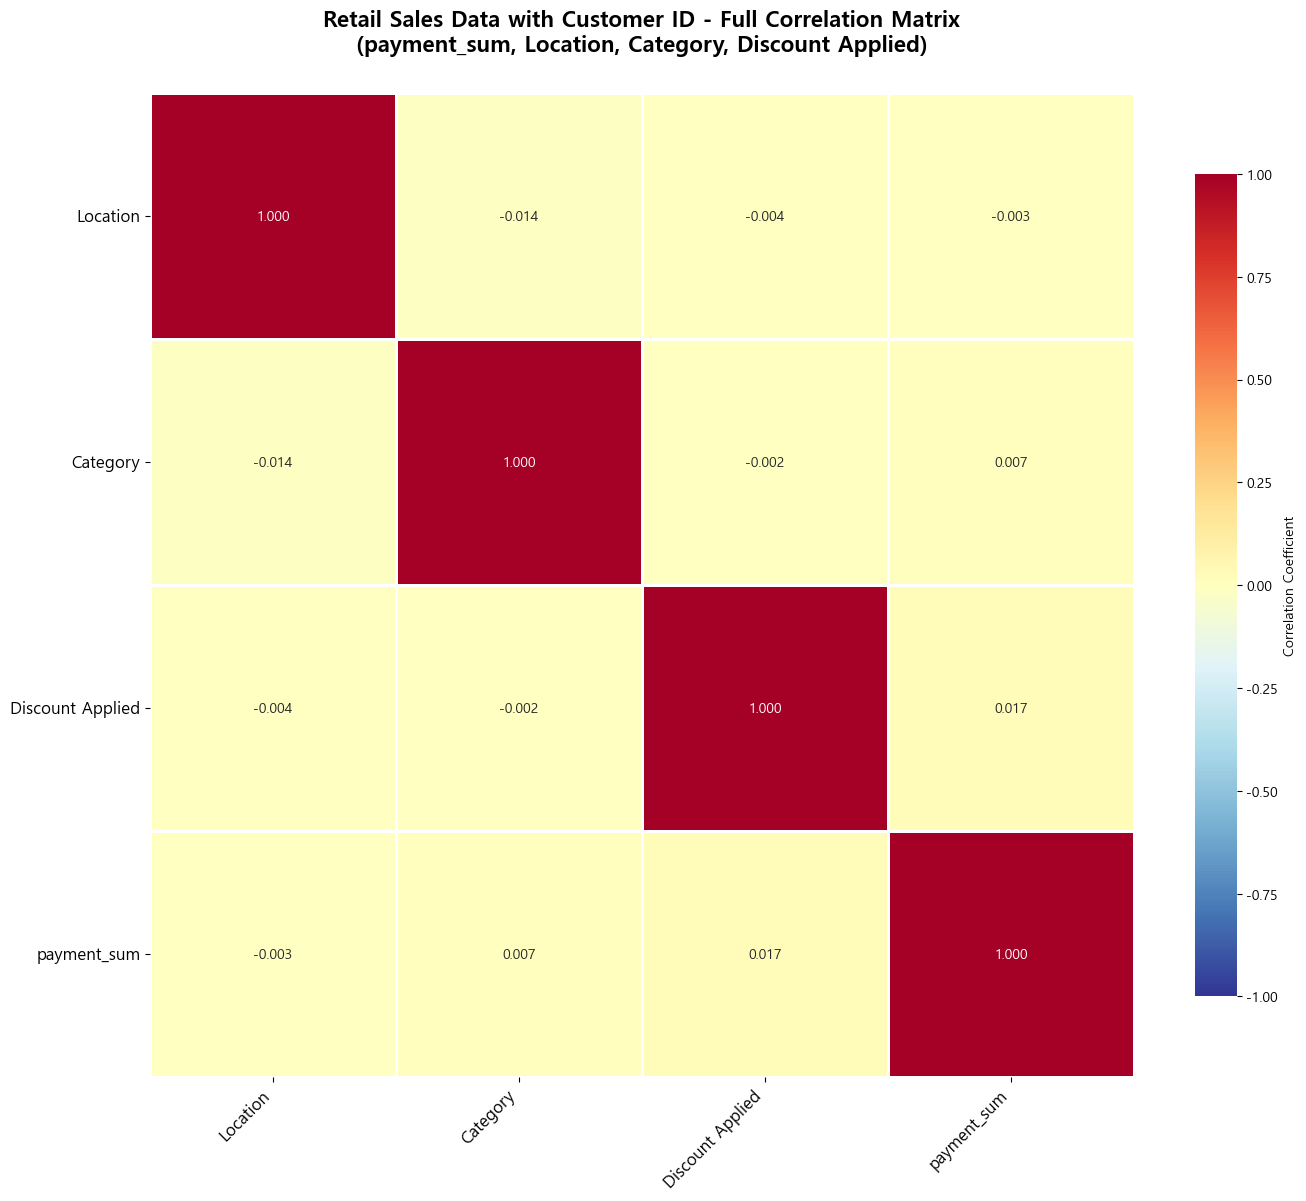

Location vs Category: -0.014 
Location vs Discount Applied: -0.004 
Location vs payment_sum: -0.003 
Category vs Discount Applied: -0.002 
Category vs payment_sum: +0.007 
Discount Applied vs payment_sum: +0.017 


Total Spent
110.0    162
108.5    148
124.0     89
40.0      87
140.0     83
        ... 
170.0     17
30.5      17
17.0      16
37.0      15
166.5     12
Name: count, Length: 228, dtype: int64

In [ ]:
# (3) NA값을 중위값으로 대체 

# 데이터 로드
df = pd.read_csv("C:/Users/campus4D062/Desktop/교육자료/vscode/Practice/retail_store_sales.csv")

# 분석할 컬럼 지정
columns_of_interest = ['Payment Method', 'Location', 'Category', 'Discount Applied']


# 분석 대상 컬럼의 결측치가 있는 행 제거
df_clean = df.dropna(subset=columns_of_interest).copy()

# df_clean의 'Total Spent' 결측치만 카테고리별 평균으로 보정
df_clean['Total Spent'] = df_clean['Total Spent'].fillna(
    df_clean.groupby('Category')['Total Spent'].transform('median')
)

# 분석할 컬럼들로 최종 DataFrame 생성
df_selected = df_clean[columns_of_interest + ['Total Spent']].copy()


# 범주형 변수들을 숫자로 인코딩 (pandas 기본 기능 사용)
mapping_dict = {}
df_encoded = df_selected.copy()

for col in ['Payment Method', 'Location', 'Category']:
    # (1) 고유값을 등장 순서대로 추출
    unique_values = df_selected[col].unique()
    
    # (2) 매핑: 값 → 숫자
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    
    # (3) 역매핑: 숫자 → 값 (매핑 순서 보장)
    reverse_mapping = {idx: value for idx, value in enumerate(unique_values)}
    
    # (4) 실제 적용
    df_encoded[col] = df_selected[col].map(mapping)
    
    # (5) 저장
    mapping_dict[col] = reverse_mapping


# payment_method 별 total spent 합산 후 payment_sum으로 지정 후 인코딩하고 거래횟수, 총거래금액을 함께 출력
df_encoded['payment_sum'] = df_encoded.groupby('Payment Method')['Total Spent'].transform('sum')
payment_summary = df_encoded.groupby('Payment Method')['Total Spent'].agg(['sum', 'count'])
for payment_method_code, (total_amount, transaction_count) in payment_summary.iterrows():
    original_payment_method = mapping_dict['Payment Method'][payment_method_code]
    print(f"{original_payment_method}: {total_amount:,.0f} ({transaction_count:,}건)")

# Payment Method, Total Spent 컬럼은 상관관계 분석에서 제외
df_encoded = df_encoded.drop(columns=['Payment Method'])
df_encoded = df_encoded.drop(columns=['Total Spent'])

# 상관관계 계산 후 행렬 출력
correlation_matrix = df_encoded.corr() 
print(f"\n 상관관계 행렬:")
print(correlation_matrix.round(3))

# 히트맵 그리기 (전체 매트릭스)
plt.figure(figsize=(14, 12))

sns.heatmap(correlation_matrix, 
            annot=True,           # 수치 표시
            cmap='RdYlBu_r',      # 색상 맵 (빨강-노랑-파랑)
            center=0,             # 중심값
            square=True,          # 정사각형 셀
            fmt='.3f',            # 소수점 3자리
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            linewidths=1.0,       # 선 두께
            vmin=-1, vmax=1)      # 색상 범위 명시

plt.title('Retail Sales Data with Customer ID - Full Correlation Matrix\n(payment_sum, Location, Category, Discount Applied)', 
          fontsize=16, pad=30, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# 상관관계 출력
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        correlations.append((abs(corr_value), corr_value, col1, col2))
for abs_corr, corr_value, col1, col2 in correlations:
    print(f"{col1} vs {col2}: {corr_value:+.3f} ")


df_clean['Total Spent'].value_counts()

